In [1]:
import torch
import sys
sys.path.append('../../Scripts')

from cnnArch import ConvolutionalNeuralNetwork
from trainTestValFunctions import test_model
from loadData import getTestDataLoader
from LoadSaveModel import loadModel
from evaluation import confusionMatrix

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Load Model

In [4]:
model = ConvolutionalNeuralNetwork().to(device)
model.load_state_dict(loadModel('CNNv1_24'))
model.eval()

ConvolutionalNeuralNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=67712, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=53, bias=True)
  )
)

# Load and Test Data

In [5]:
test_dataloader = getTestDataLoader(batch_size)

## Run Test Function

In [6]:
test_model(test_dataloader, model,loss_fn)

Test Error: 
 Accuracy: 78.1%, Avg loss: 1.429841 



# Evaluation Metrics

## Confusion Matrix

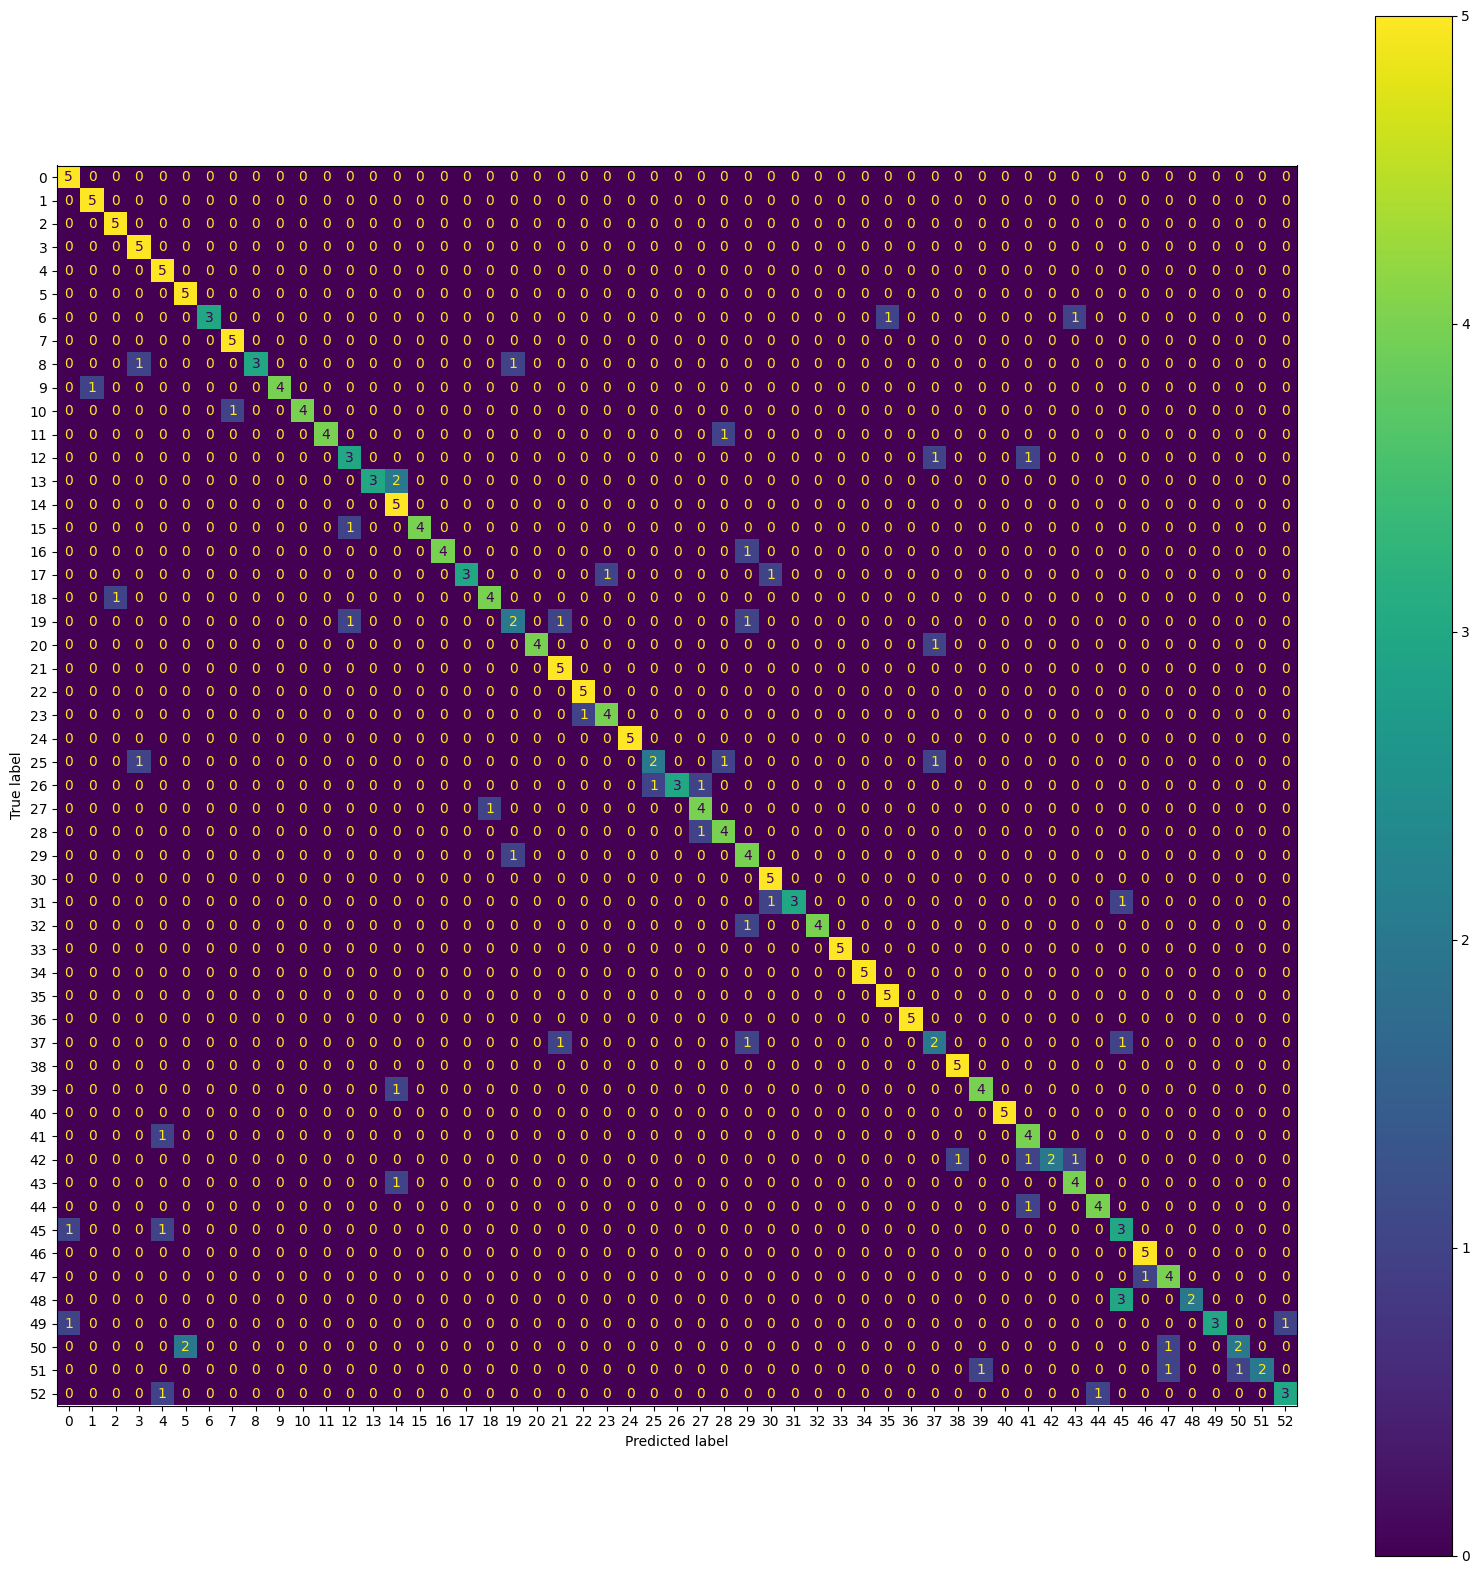

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusionMatrix(model, test_dataloader, device)

fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()


# Visualized Predictions